# 12. Histogram Equalization

In [1]:
import numpy as np
import pandas as pd
import cv2
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt


# User Input

In [2]:
# data= []
# n= int(input("Enter no. of gray levels: "))
# for i in range(n):
#     gray_lvl, nos= map(int, input('Enter gray level and no. of pixel: ').split())
#     data.append([gray_lvl, nos])
# data= np.array(data)

n= 8
data= np.array([[0, 790],
 [1, 1023],
 [2, 850],
 [3, 656],
 [4, 329],
 [5, 245],
 [6, 122],
 [7, 81]])

In [3]:
data

array([[   0,  790],
       [   1, 1023],
       [   2,  850],
       [   3,  656],
       [   4,  329],
       [   5,  245],
       [   6,  122],
       [   7,   81]])

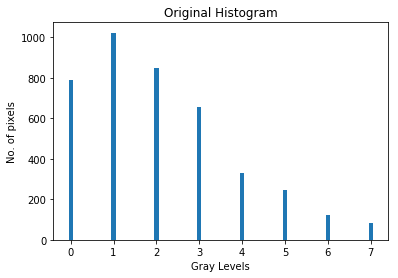

In [4]:
plt.bar(data[:, 0], data[:, 1], width= 0.1)
plt.title('Original Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [5]:
total_sum= np.sum(data[:, 1])
cdf= 0
table= []
for row in data:
    pdf= round(row[1]/total_sum, 2)
    cdf+= pdf
    r= list(row)
    r.extend([pdf, cdf, round(cdf*(n-1), 0)])
    table.append(r)
table= np.array(table)
table

array([[0.000e+00, 7.900e+02, 1.900e-01, 1.900e-01, 1.000e+00],
       [1.000e+00, 1.023e+03, 2.500e-01, 4.400e-01, 3.000e+00],
       [2.000e+00, 8.500e+02, 2.100e-01, 6.500e-01, 5.000e+00],
       [3.000e+00, 6.560e+02, 1.600e-01, 8.100e-01, 6.000e+00],
       [4.000e+00, 3.290e+02, 8.000e-02, 8.900e-01, 6.000e+00],
       [5.000e+00, 2.450e+02, 6.000e-02, 9.500e-01, 7.000e+00],
       [6.000e+00, 1.220e+02, 3.000e-02, 9.800e-01, 7.000e+00],
       [7.000e+00, 8.100e+01, 2.000e-02, 1.000e+00, 7.000e+00]])

In [6]:
df= pd.DataFrame(table, columns= ['Gray Levels', 'No. of pixels', 'PDF', 'CDF', '(L-1)*CDF'])
df.head(n)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,790.0,0.19,0.19,1.0
1,1.0,1023.0,0.25,0.44,3.0
2,2.0,850.0,0.21,0.65,5.0
3,3.0,656.0,0.16,0.81,6.0
4,4.0,329.0,0.08,0.89,6.0
5,5.0,245.0,0.06,0.95,7.0
6,6.0,122.0,0.03,0.98,7.0
7,7.0,81.0,0.02,1.00,7.0


In [7]:
new_data=[0 for i in range(n)]
for i in range(len(data)):
    new_data[int(table[i,4])]+= data[i, 1]

In [8]:
new_data

[0, 790, 0, 1023, 0, 850, 985, 448]

In [9]:
hist_data=[]
for i in range(n):
    hist_data.append([i, new_data[i]])
hist_data= np.array(hist_data)

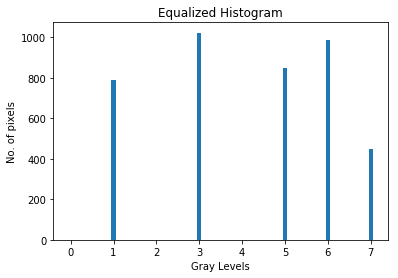

In [10]:
plt.bar(hist_data[:, 0], hist_data[:, 1], width= 0.1)
plt.title('Equalized Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

# Image

In [11]:
img_file= input("Enter image file name: ")
img=cv2.imread(img_file)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape

Enter image file name: ./Images/pebbles.png


(569, 570, 3)

In [12]:
img0= img[:, :, 0]
img1= img[:, :, 1]
img2= img[:, :, 2]
img0.shape, img1.shape, img2.shape

((569, 570), (569, 570), (569, 570))

In [13]:
def histogram_equalization_img(img, L):
    count= dict(Counter(img.ravel()))
    data_img= []
    for i in range(L):
        try:
            data_img.append([i, count[i]])
        except:
            data_img.append([i, 0])
    data_img= np.array(data_img)
    
    total_sum= np.sum(data_img[:, 1])
    cdf= 0
    table_img= []
    for row in data_img:
        pdf= row[1]/total_sum
        cdf+= pdf
        r= list(row)
        r.extend([pdf, cdf, round(cdf*(L-1), 0)])
        table_img.append(r)
    table_img= np.array(table_img)
    
    df_img= pd.DataFrame(table_img, columns= ['Gray Levels', 'No. of pixels', 'PDF', 'CDF', '(L-1)*CDF'])
    
    new_data_img= [0 for i in range(L)]
    for i in range(len(data_img)):
        new_data_img[int(table_img[i,4])]+= data_img[i, 1]
    
    hist_data_img=[]
    for i in range(L):
        hist_data_img.append([i, new_data_img[i]])
    hist_data_img= np.array(hist_data_img)
    
    new_img= img.copy()
    for i in range(len(data_img)):
        new_img[img==i]= table_img[i,4]
    return data_img, df_img, hist_data_img, new_img

In [14]:
data_img0, df_img0, hist_data_img0, new_img0= histogram_equalization_img(img0, 256)
data_img1, df_img1, hist_data_img1, new_img1= histogram_equalization_img(img1, 256)
data_img2, df_img2, hist_data_img2, new_img2= histogram_equalization_img(img2, 256)

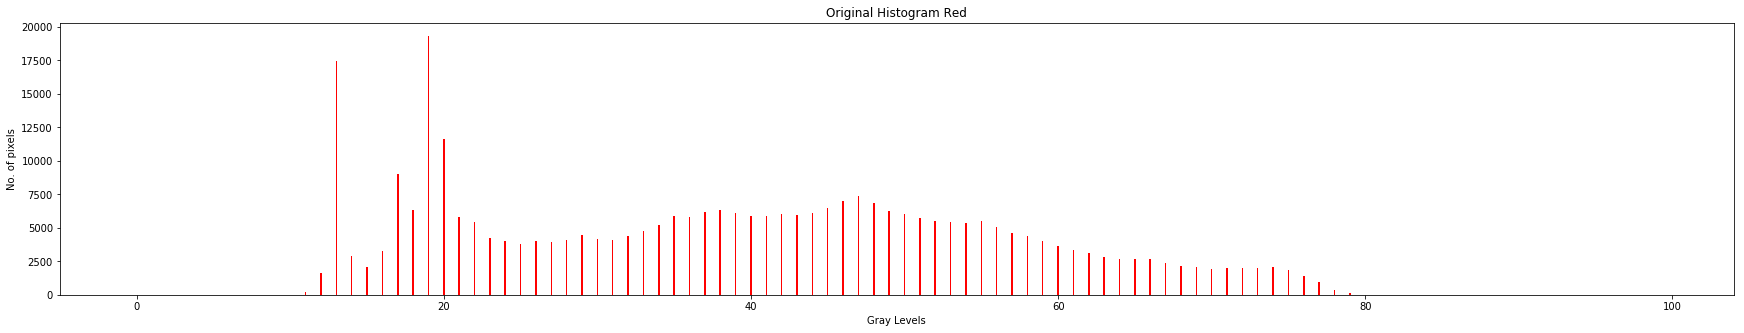

In [15]:
plt.figure(figsize= (30, 5))
plt.bar(data_img0[:100, 0], data_img0[:100, 1], width= 0.1, color='red')
plt.title('Original Histogram Red')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

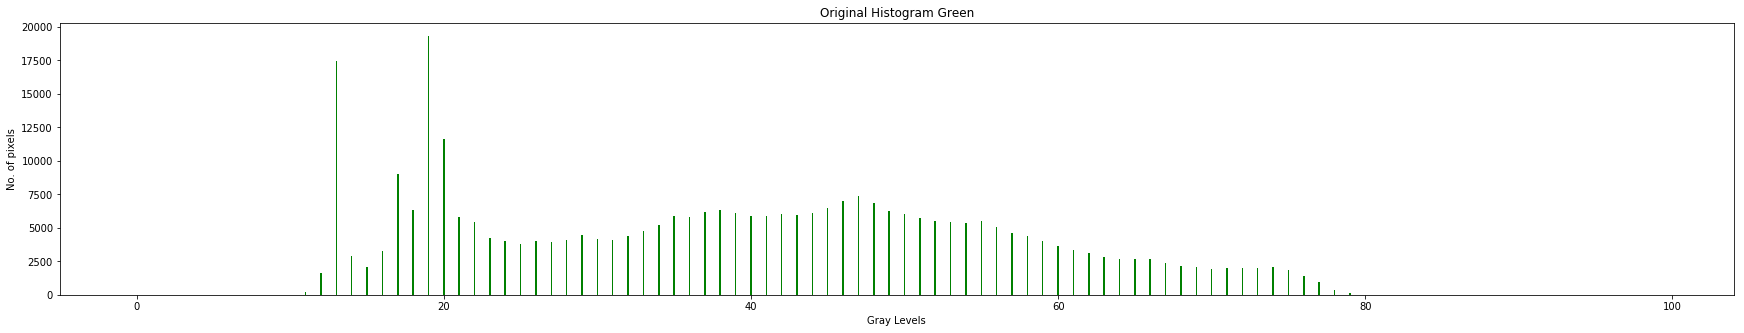

In [16]:
plt.figure(figsize= (30, 5))
plt.bar(data_img1[:100, 0], data_img1[:100, 1], width= 0.1, color='green')
plt.title('Original Histogram Green')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

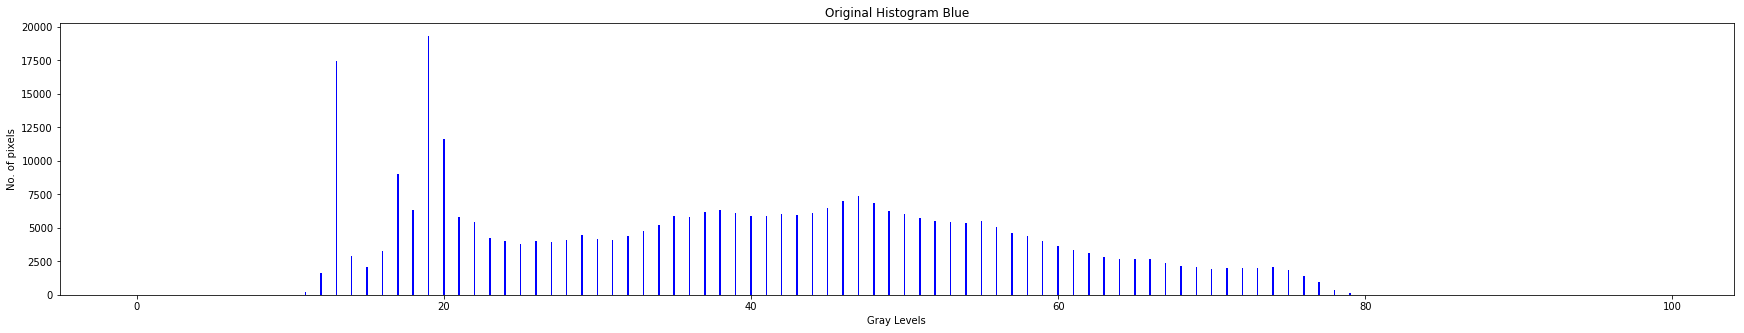

In [17]:
plt.figure(figsize= (30, 5))
plt.bar(data_img2[:100, 0], data_img2[:100, 1], width= 0.1, color='blue')
plt.title('Original Histogram Blue')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [18]:
df_img0.loc[20:].head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
20,20.0,11619.0,0.035825,0.227780,58.0
21,21.0,5802.0,0.017889,0.245670,63.0
22,22.0,5469.0,0.016862,0.262532,67.0
23,23.0,4217.0,0.013002,0.275534,70.0
24,24.0,3980.0,0.012271,0.287806,73.0
25,25.0,3759.0,0.011590,0.299396,76.0
26,26.0,4034.0,0.012438,0.311834,80.0
27,27.0,3943.0,0.012157,0.323991,83.0
28,28.0,4085.0,0.012595,0.336586,86.0
29,29.0,4485.0,0.013829,0.350415,89.0


In [19]:
df_img1.loc[20:].head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
20,20.0,11619.0,0.035825,0.227780,58.0
21,21.0,5802.0,0.017889,0.245670,63.0
22,22.0,5469.0,0.016862,0.262532,67.0
23,23.0,4217.0,0.013002,0.275534,70.0
24,24.0,3980.0,0.012271,0.287806,73.0
25,25.0,3759.0,0.011590,0.299396,76.0
26,26.0,4034.0,0.012438,0.311834,80.0
27,27.0,3943.0,0.012157,0.323991,83.0
28,28.0,4085.0,0.012595,0.336586,86.0
29,29.0,4485.0,0.013829,0.350415,89.0


In [20]:
df_img2.loc[20:].head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
20,20.0,11619.0,0.035825,0.227780,58.0
21,21.0,5802.0,0.017889,0.245670,63.0
22,22.0,5469.0,0.016862,0.262532,67.0
23,23.0,4217.0,0.013002,0.275534,70.0
24,24.0,3980.0,0.012271,0.287806,73.0
25,25.0,3759.0,0.011590,0.299396,76.0
26,26.0,4034.0,0.012438,0.311834,80.0
27,27.0,3943.0,0.012157,0.323991,83.0
28,28.0,4085.0,0.012595,0.336586,86.0
29,29.0,4485.0,0.013829,0.350415,89.0


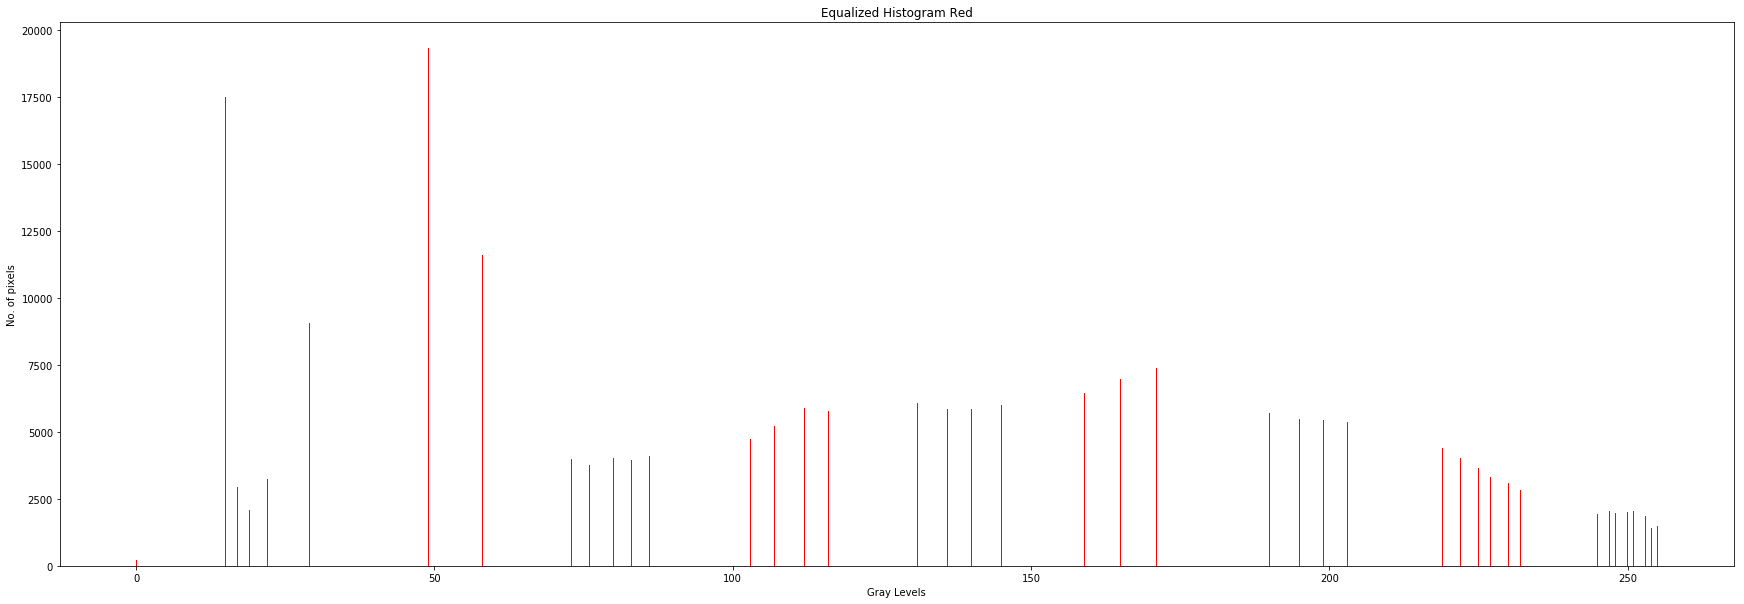

In [21]:
plt.figure(figsize= (30, 10))
plt.bar(hist_data_img0[:, 0], hist_data_img0[:, 1], width= 0.1, color= 'red')
plt.title('Equalized Histogram Red')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

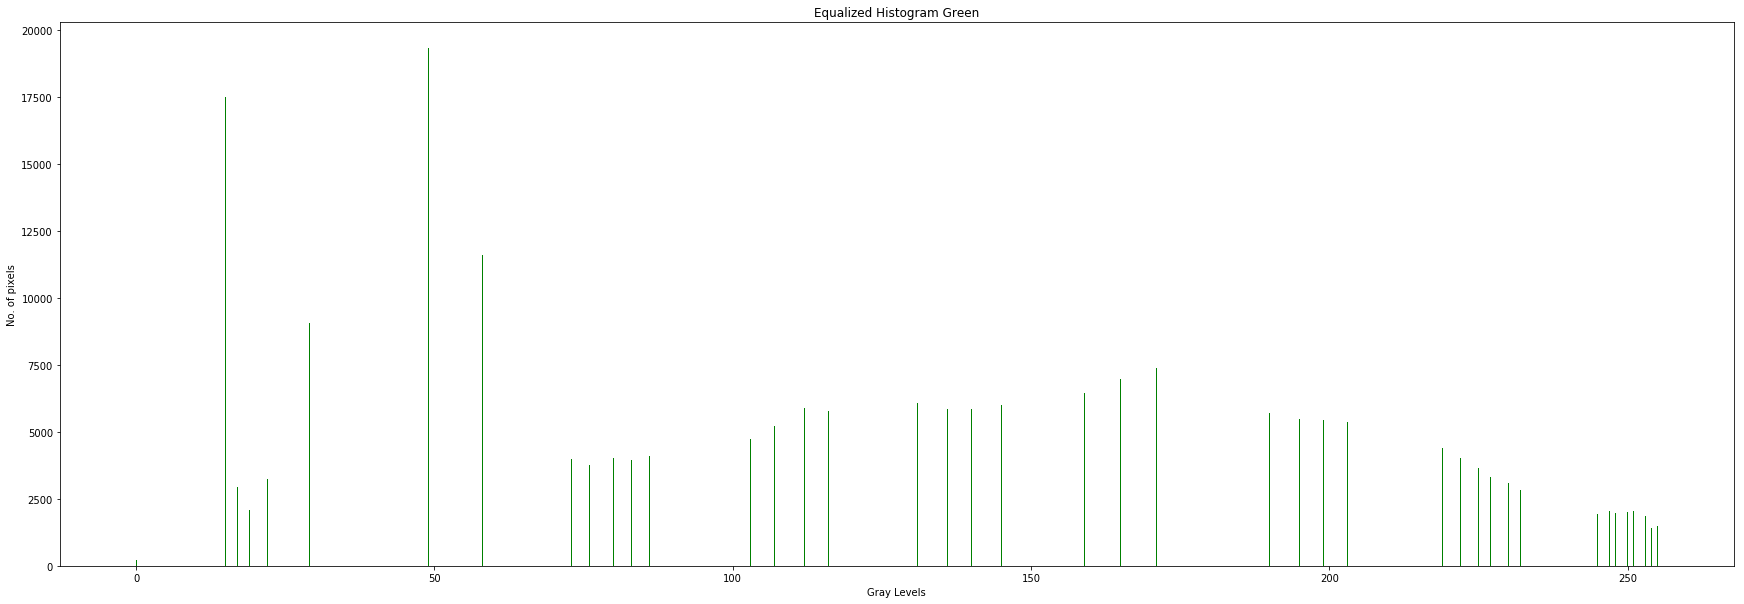

In [22]:
plt.figure(figsize= (30, 10))
plt.bar(hist_data_img1[:, 0], hist_data_img1[:, 1], width= 0.1, color= 'green')
plt.title('Equalized Histogram Green')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

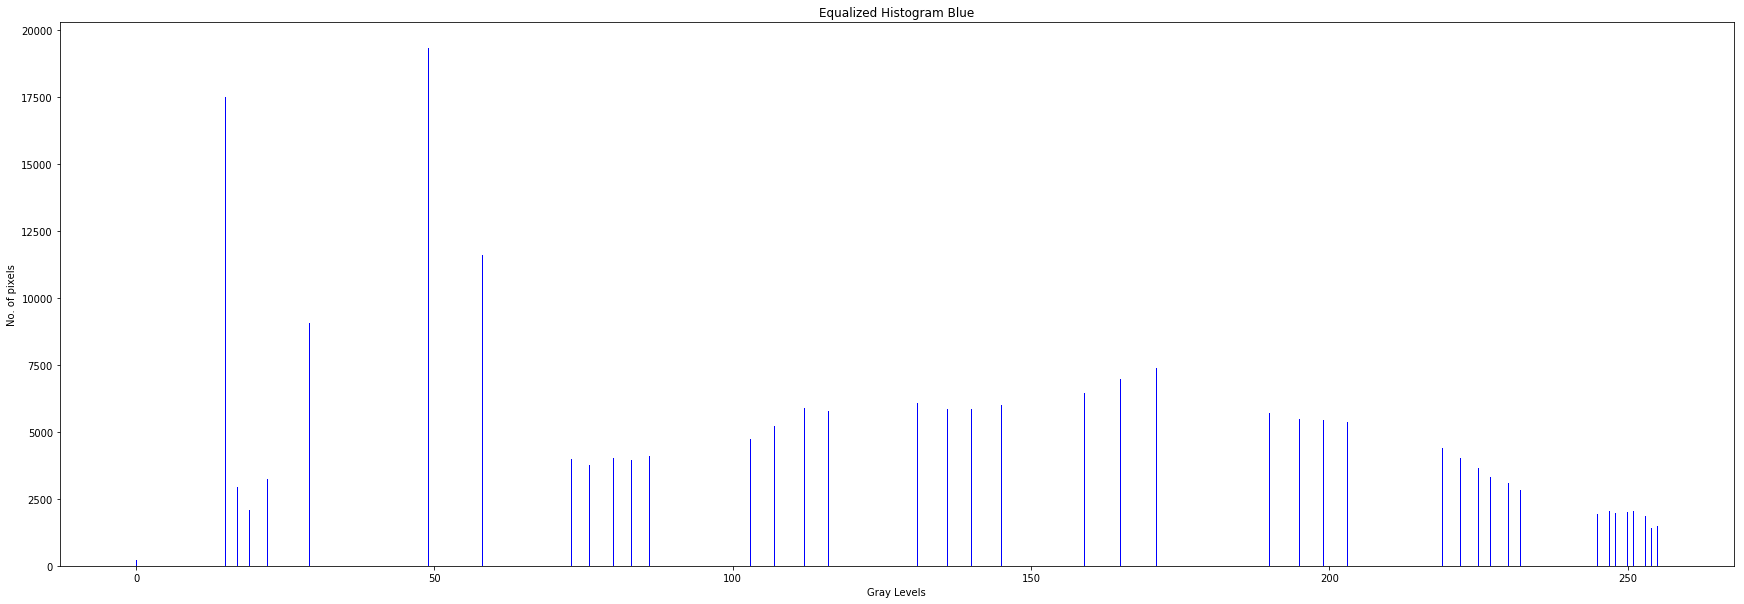

In [23]:
plt.figure(figsize= (30, 10))
plt.bar(hist_data_img2[:, 0], hist_data_img2[:, 1], width= 0.1, color= 'blue')
plt.title('Equalized Histogram Blue')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [24]:
new_img= np.array([new_img0.T, new_img1.T, new_img2.T]).T

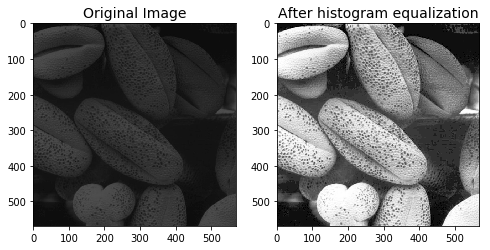

In [25]:
fig, ax= plt.subplots(ncols= 2, figsize= (8, 4))
fsize= 14

ax[0].set_title("Original Image", fontsize= fsize)
ax[0].imshow(img)

ax[1].set_title("After histogram equalization", fontsize= fsize)
ax[1].imshow(new_img)

plt.show()